# Časové vizualizace

# Line chart

Time elapsed is 7.819805 seconds


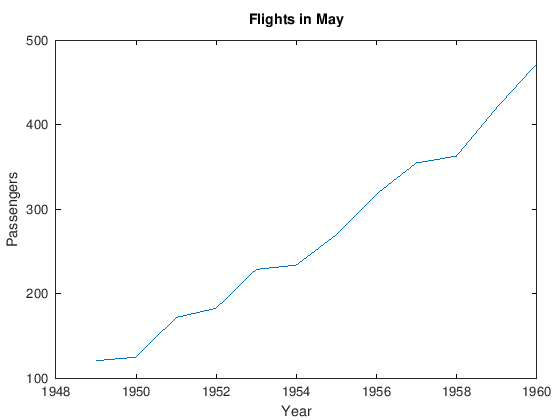

In [14]:
% Start the timer
tic;

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Read the CSV file
fid = fopen('data/flights.csv', 'r');
data = textscan(fid, '%d %s %d', 'Delimiter', ',', 'HeaderLines', 1);
fclose(fid);

% Extract year, month, and passengers columns
year = data{1};
month = data{2};
passengers = data{3};

% Filter the data for May flights
may_indices = strcmp(month, 'May');
may_year = year(may_indices);
may_passengers = passengers(may_indices);

% Create line plot
plot(may_year, may_passengers, 'LineWidth', 2);

% Add title and labels
title('Flights in May');
xlabel('Year');
ylabel('Passengers');

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Stacked area chart

Time elapsed is 6.094379 seconds


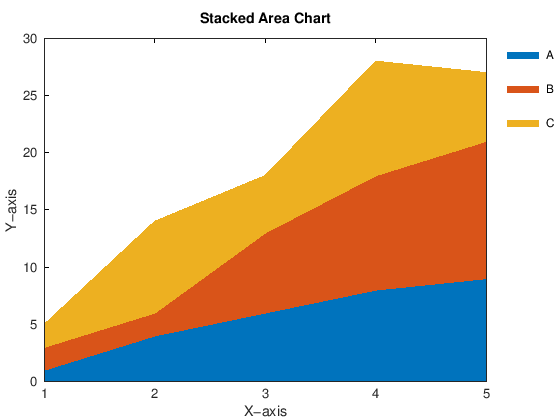

In [15]:
% Start the timer
tic;

% Data
x = 1:5;
y = [1 4 6 8 9; 2 2 7 10 12; 2 8 5 10 6];

% Plot stacked area chart
area(x, y', 'LineStyle', 'none');

% Set legend, x-axis label, y-axis label, and title
legend('A', 'B', 'C', 'Location', 'northeastoutside');

% Turn off the box around the legend
legend boxoff

xlabel('X-axis');
ylabel('Y-axis');
title('Stacked Area Chart');

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Relační vizualizace

# Pie chart

Time elapsed is 11.454586 seconds


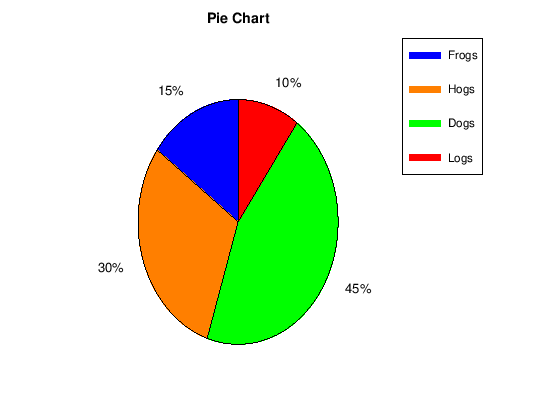

In [16]:
% Start the timer
tic;

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% declaring data
data = [15, 30, 45, 10];
keys = {'Frogs', 'Hogs', 'Dogs', 'Logs'};

% define colors for the pie chart
colors = {[0, 0, 1], [1, 0.5, 0], [0, 1, 0], [1, 0, 0]}; % RGB values for blue, orange, green, red

% create pie chart
h = pie(data);
title('Pie Chart');

% apply colors using for loop
color_index = 1;
for i = 1:length(h)
  if strcmp(get(h(i), 'Type'), 'patch')
    set(h(i), 'FaceColor', colors{color_index});
    color_index = color_index + 1;
  end
end

% add legend
legend(keys, 'Location', 'northeastoutside');

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Scatter plot matrix

Time elapsed is 9.531872 seconds


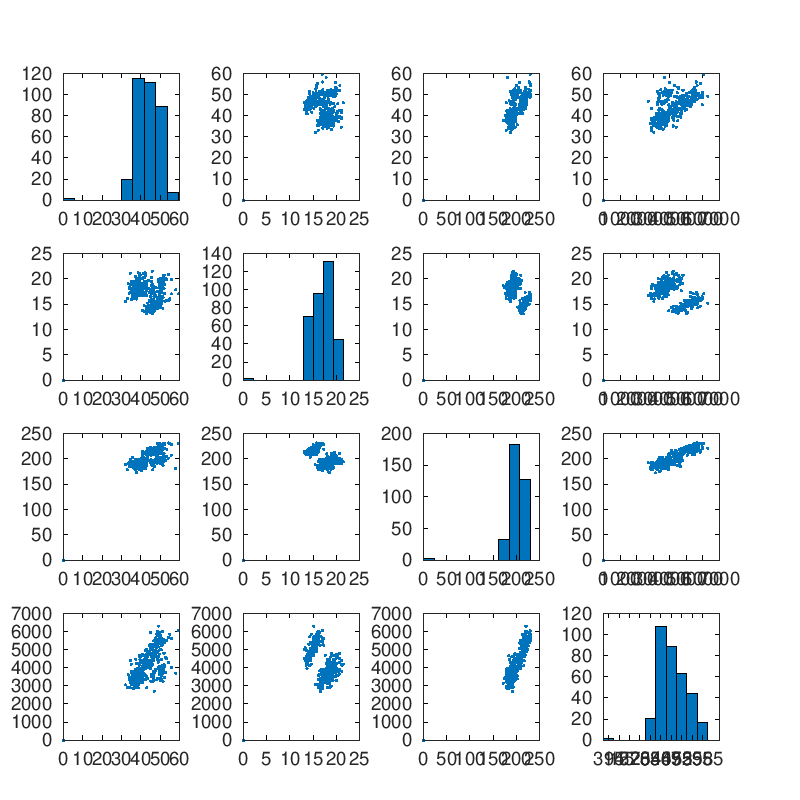

In [17]:
% Start the timer
tic;

% Load the statistics package
pkg load statistics

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Load the dataset
data = csvread("data/penguins.csv", 1, 0);

% Extract columns 3 to 6
numeric_data = data(:, 3:6);

% Remove rows with missing values
numeric_data = numeric_data(all(~isnan(numeric_data), 2), :);

% Create a new figure with a larger size
figure('Position', [0, 0, 800, 800]);

% Create scatter plot matrix
plotmatrix(numeric_data);

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

Time elapsed is 23.092437 seconds


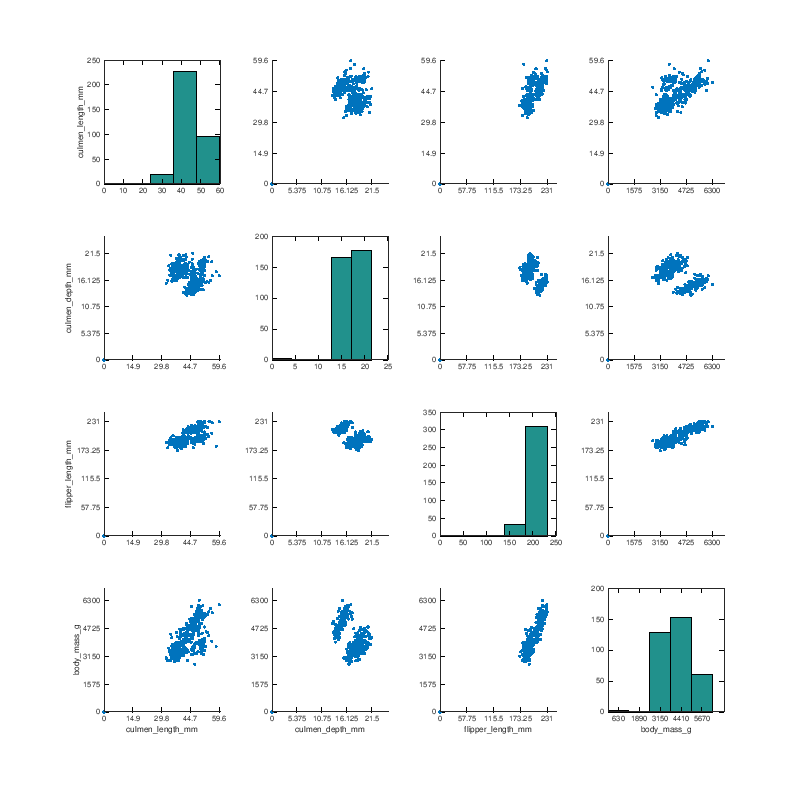

In [18]:
% Start the timer
tic;

% Load the dataset
data = csvread("data/penguins.csv", 1, 0);

% Extract columns 3 to 6
numeric_data = data(:, 3:6);

% Remove rows with missing values
numeric_data = numeric_data(all(~isnan(numeric_data), 2), :);

% Column labels
column_labels = {'culmen\\_length\\_mm', 'culmen\\_depth\\_mm', 'flipper\\_length\\_mm', 'body\\_mass\\_g'};

% Get the number of variables (columns)
num_vars = size(numeric_data, 2);

% Create a new figure with a larger size
figure('Position', [0, 0, 800, 800]);
for i = 1:num_vars
    for j = 1:num_vars
        subplot(num_vars, num_vars, (i-1)*num_vars + j);
        if i == j
            hist(numeric_data(:, i), 5); % Adjust the number of bins if needed
            set(gca, 'FontSize', 4);
        else
            scatter(numeric_data(:, j), numeric_data(:, i), '.');
            set(gca, 'FontSize', 4); % Set font size for axes
            % Reduce the number of ticks
            set(gca, 'XTick', linspace(min(numeric_data(:, j)), max(numeric_data(:, j)), 5));
            set(gca, 'YTick', linspace(min(numeric_data(:, i)), max(numeric_data(:, i)), 5));
        end
        if i == 4
            xlabel(column_labels{j}, 'FontSize', 4);  % Use column labels for x-axis with smaller font size
        else
            xlabel('');  % Empty label for other subplots
        end
        if j == 1
            ylabel(column_labels{i}, 'FontSize', 4);  % Use column labels for y-axis with smaller font size
        else
            ylabel('');  % Empty label for other subplots
        end
    end
end

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Vizualizace rozdělení

# Histogram

Time elapsed is 6.706474 seconds


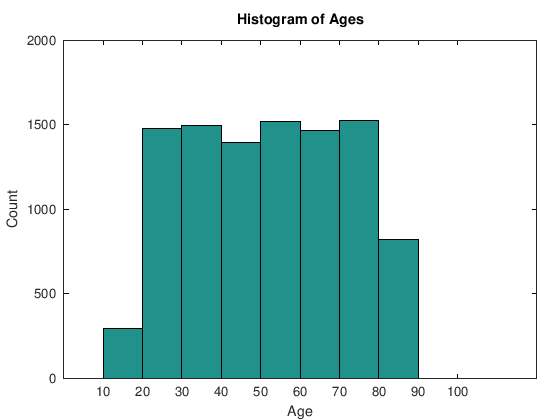

In [19]:
% Start the timer
tic;

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Open the file for reading
fileID = fopen('data/healthcare_dataset2.csv', 'r');

% Read the data using textscan, specifying ';' as the delimiter
data = textscan(fileID, '%*s %d %*[^\n]', 'Delimiter', ';', 'HeaderLines', 1);

% Close the file
fclose(fileID);

% Extract the ages column (assuming it's the second column)
ages = data{1};

% Define the bin edges
bin_edges = 10:10:100;

% Compute the histogram
age_counts = histc(ages, bin_edges);

% Plot the histogram
bar(bin_edges, age_counts, 'histc');
title('Histogram of Ages')
xlabel('Age')
ylabel('Count')

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Box plot

Time elapsed is 15.084347 seconds


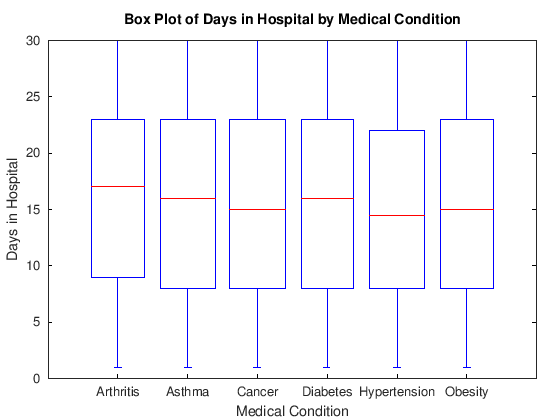

In [20]:
% Start the timer
tic;

pkg load statistics
% Open the file for reading
fileID = fopen('data/healthcare_dataset2.csv', 'r');

% Read the data using textscan, specifying ';' as the delimiter
data = textscan(fileID, '%*s %*s %*s %*s %s %*s %*s %*s %*s %*s %*s %*s %*s %*s %*s %d %*[^\n]', 'Delimiter', ';', 'HeaderLines', 1);

% Close the file
fclose(fileID);

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')


% Extract the medical condition and days in hospital columns
medical_condition = data{1};
days_in_hospital = data{2};

% Group the days in hospital by medical condition
[unique_conditions, ~, idx] = unique(medical_condition);
grouped_days = accumarray(idx, days_in_hospital, [], @(x) {x});

% Find the maximum group size
max_group_size = max(cellfun(@numel, grouped_days));

% Create a matrix for boxplot, padding shorter groups with NaN
grouped_days_mat = NaN(max_group_size, numel(grouped_days));
for i = 1:numel(grouped_days)
    grouped_days_mat(1:numel(grouped_days{i}), i) = grouped_days{i};
end

% Plot the box plot
boxplot(grouped_days_mat);
set(gca, 'XTickLabel', unique_conditions);
title('Box Plot of Days in Hospital by Medical Condition')
xlabel('Medical Condition')
ylabel('Days in Hospital')

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Kategorické vizualizace

# Bar chart

Time elapsed is 10.363962 seconds


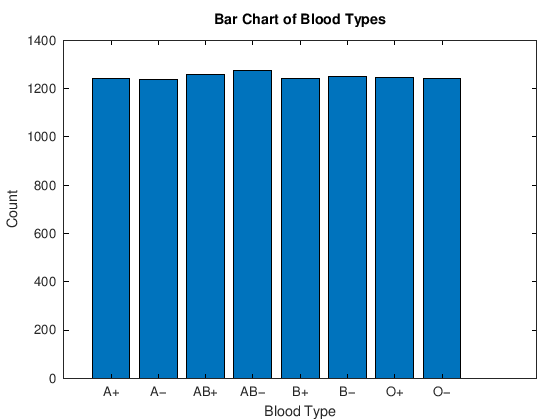

In [21]:
% Start the timer
tic;

% Open the file for reading
fileID = fopen('data/healthcare_dataset2.csv', 'r');

% Read the data using textscan, specifying ';' as the delimiter
data = textscan(fileID, '%s %f %s %s %*[^\n]', 'Delimiter', ';', 'HeaderLines', 1);

% Close the file
fclose(fileID);

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Extract the blood types column (assuming it's the fourth column)
blood_types = data{4};

% Compute unique blood types and their counts
[unique_blood_types, ~, idx] = unique(blood_types);
blood_type_counts = histc(idx, 1:numel(unique_blood_types));

% Plot the bar chart
bar(1:numel(unique_blood_types), blood_type_counts)
xticks(1:numel(unique_blood_types))
xticklabels(unique_blood_types)
title('Bar Chart of Blood Types')
xlabel('Blood Type')
ylabel('Count')

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Grouped bar chart

Time elapsed is 13.100375 seconds


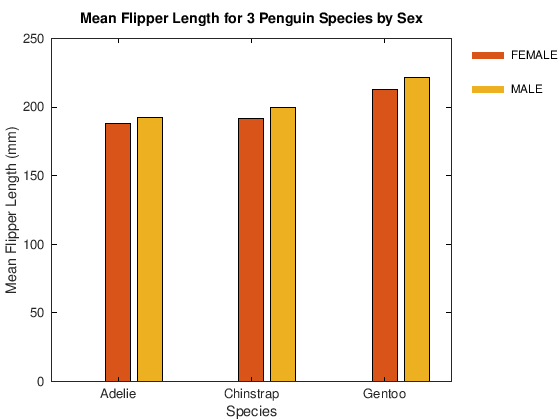

In [22]:
% Start the timer
tic;

% Open the file
fid = fopen('data/penguins.csv');

% Read the data
data = textscan(fid, '%s %*s %*s %*s %f %*s %s', 'Delimiter', ',', 'HeaderLines', 1);

% Close the file
fclose(fid);

% Extract the relevant columns
species = data{1};
flipper_length = data{2};
sex = data{3};

% Convert species and sex to numeric indices
[species_labels,~,species] = unique(species);
[sex_labels,~,sex] = unique(sex);

% Calculate the mean flipper length for each species and sex
mean_data = accumarray([species, sex], flipper_length, [], @mean);

% Reshape the data into a matrix for plotting
mean_data = reshape(mean_data, [max(species), max(sex)]);

% Create a grouped bar chart
h = bar(mean_data);

% Set the title and labels
title('Mean Flipper Length for 3 Penguin Species by Sex')
xlabel('Species')
ylabel('Mean Flipper Length (mm)')

% Set the x-axis tick labels to the species names
set(gca, 'XTickLabel', species_labels)

% Add a legend and move it to the northeast corner
legend(h, sex_labels, 'location', 'northeastoutside')

legend boxoff

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Stacked bar chart

Time elapsed is 5.629903 seconds


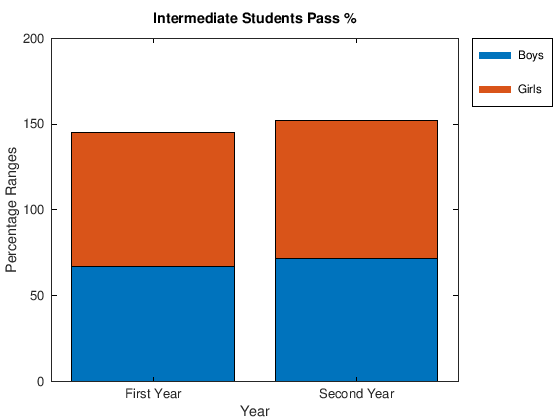

In [23]:
% Start the timer
tic;

% Create data
Boys = [67, 78];
Girls = [72, 80];

% Combine data into a matrix
data = [Boys; Girls];

% Create a stacked bar chart
bar(data, 'stacked');

% Add title and labels
title('Intermediate Students Pass %');
xlabel('Year');
ylabel('Percentage Ranges');

% Add legend
legend('Boys', 'Girls', 'location', 'northeastoutside');

% Set the x-axis tick labels
set(gca, 'xticklabel', {'First Year', 'Second Year'});

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Hierarchické vizualizace

# Venn diagram

Time elapsed is 6.653220 seconds


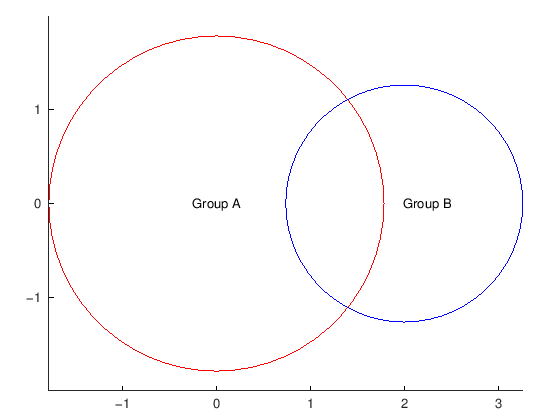

In [24]:
% Start the timer
tic;

# Create figure and axes
figure;
hold on;
axis equal;

# Create circles
r = sqrt(10/pi);
circle1 = rectangle('Position',[-r,-r,2*r,2*r],'Curvature',[1,1]);
r = sqrt(5/pi);
circle2 = rectangle('Position',[2-r,-r,2*r,2*r],'Curvature',[1,1]);

# Set colors
set(circle1,'EdgeColor','r');  # red edge color
set(circle2,'EdgeColor','b');  # blue edge color

# Add labels
text(0, 0, 'Group A', 'HorizontalAlignment', 'center');
text(2.5, 0, 'Group B', 'HorizontalAlignment', 'right');

# Show the plot
hold off;

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# Heatmap

Time elapsed is 13.617579 seconds


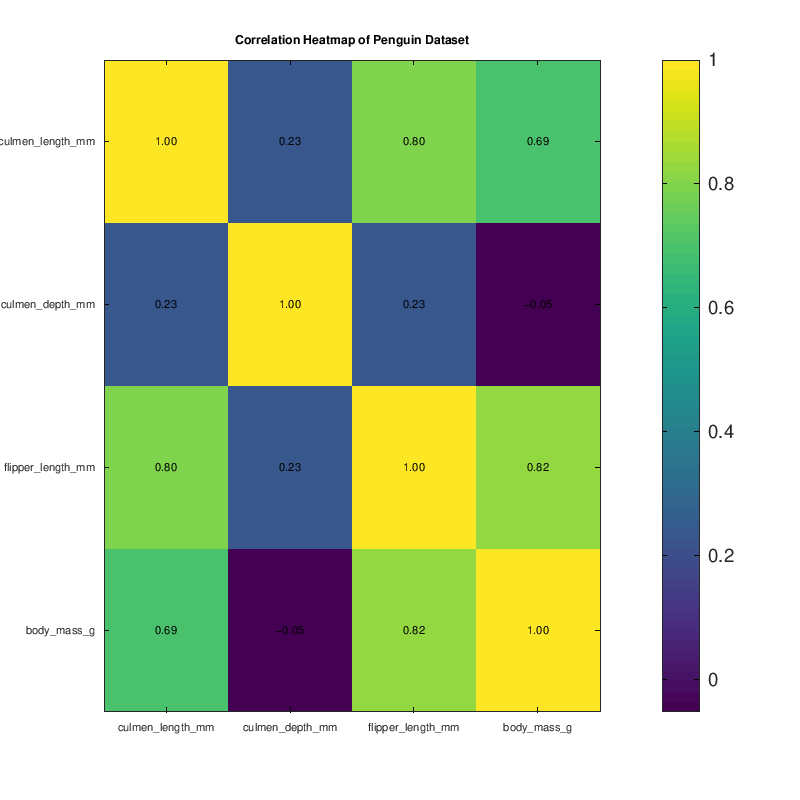

In [25]:
% Start the timer
tic;

% Load the necessary package
pkg load statistics

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Load the data
data = csvread("data/penguins.csv");

% Extract columns 3 to 6
numeric_data = data(:, 3:6);

% Replace NaN values with zeros
numeric_data(isnan(numeric_data)) = 0;

% Calculate the correlation matrix
corr_matrix = corr(numeric_data);

% Create a larger figure
figure('Position', [100, 100, 800, 800]);  % Adjust the position and size as needed

% Plot the heatmap
imagesc(corr_matrix);

% Define column labels for columns 3 to 6
column_labels = {'culmen\\_length\\_mm', 'culmen\\_depth\\_mm', 'flipper\\_length\\_mm', 'body\\_mass\\_g'};

% Add ticks and labels for each feature
xticks(1:size(corr_matrix, 1));
yticks(1:size(corr_matrix, 2));

% Set labels for x-axis ticks with smaller font size
xticklabels(column_labels);
set(gca, 'FontSize', 6); % Set font size for x-axis labels

% Set labels for y-axis ticks with smaller font size
yticklabels(column_labels);
set(gca, 'FontSize', 6 ); % Set font size for y-axis labels

% Add values of correlation
for i = 1:size(corr_matrix, 1)
    for j = 1:size(corr_matrix, 2)
        text(j, i, num2str(corr_matrix(i, j), '%.2f'), ...
            'HorizontalAlignment', 'center', 'VerticalAlignment', 'middle', 'FontSize', 6);
    end
end

% Add a color bar
colorbar;

% Add a title
title("Correlation Heatmap of Penguin Dataset");

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);